## K-NN (K-Nearest Neighbors) 알고리즘

### 알고리즘의 원리

![](https://velog.velcdn.com/images/newnew_daddy/post/5cdaac3b-e27d-4a0e-aecb-27296b498d5d/image.png)

1. **거리 측정**: 
- 새로운 데이터 포인트와 기존 데이터 포인트들 간의 거리를 계산.(유클리드 거리, 맨해튼 거리 등) 

2. **K개의 이웃 선택**:
- 가장 가까운 K개의 데이터 포인트를 선택한다. 
- K는 사용자가 설정해야 하는 하이퍼파라미터이며, K의 값에 따라 모델의 성능이 달라질 수 있다.

3. **다수결 투표**:
- 선택된 K개의 이웃 중 가장 많이 등장하는 클래스로 새로운 데이터 포인트를 분류. 
- 예를 들어, K = 3이고, 세 이웃 중 두 개가 클래스 A이고 하나가 클래스 B라면, 새로운 데이터 포인트는 클래스 A로 분류된다.

### K-NN의 특징
- 구현이 간단하고 이해하기 쉬우며, 직관적이다. 복잡한 수학적 모델을 필요로 하지 않는다.
- 데이터의 크기나 스케일에 민감하므로, 일반적으로 데이터 전처리 과정에서 정규화나 표준화가 필요하다.
- 하이퍼파라미터 K는 일반적으로 홀수로 선택하여 투표 결과가 동률이 되는 것을 방지한다.
- 너무 작은 K 값은 모델이 과적합(Overfitting)되는 경향이 있고, 너무 큰 K 값은 모델이 과소적합(Underfitting)되는 경향이 있다.

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)

# 데이터 로드
bc = load_breast_cancer()
X = bc.data
y = bc.target

X[0]

array([  17.99    ,   10.38    ,  122.8     , 1001.      ,    0.1184  ,
          0.2776  ,    0.3001  ,    0.1471  ,    0.2419  ,    0.07871 ,
          1.095   ,    0.9053  ,    8.589   ,  153.4     ,    0.006399,
          0.04904 ,    0.05373 ,    0.01587 ,    0.03003 ,    0.006193,
         25.38    ,   17.33    ,  184.6     , 2019.      ,    0.1622  ,
          0.6656  ,    0.7119  ,    0.2654  ,    0.4601  ,    0.1189  ])

In [19]:
from sklearn.preprocessing import StandardScaler


# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [21]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# K-NN 모델 생성 (K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_test)

In [27]:
## 모델 정확도 평가

print("Train : ", knn.score(X_train, y_train))
print("Test : ", knn.score(X_test, y_test))

Train :  0.9849246231155779
Test :  0.9590643274853801


In [22]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print('-'*50)
# 분류 리포트 출력
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.96
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 59   4]
 [  3 105]]


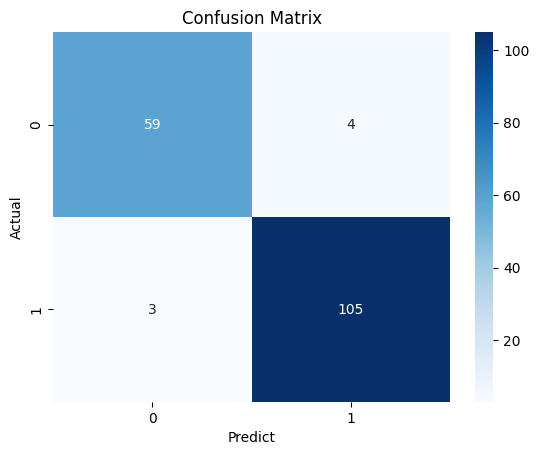

In [25]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()